In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing Kaggle package to import the dataset

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Connecting to kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~ /content/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31           9986        334  1.0              
googleai/musiccaps                                              MusicCaps                                          793KB  2023-01-25 09:25:48           2147        201  0.9411765        
themrityunjaypathak/most-subscribed-1000-youtube-channels       Most Subscribed 1000 Youtube Channels               28KB  2023-01-21 14:42:05           3021         91  1.0              
nitishsharma01/olympics-124-years-datasettill-2020              O

# Downloading the dataset

In [ ]:
!kaggle datasets download 'alexattia/the-simpsons-characters-dataset'

 99% 1.07G/1.08G [00:13<00:00, 108MB/s]
100% 1.08G/1.08G [00:14<00:00, 82.5MB/s]


# Unziping the files

In [ ]:
from zipfile import ZipFile

In [ ]:
!unzip '/content/the-simpsons-characters-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

The given problem is classification problem so we use CNN model to recognise simpsons neural network.

# Importing the Libraries



# 1.Data Preprocessing and Visualizations

We are predicting the pictures for Simpsons character,for this we use Keras and tensorflow libraries.

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels

    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
  
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

# Create a list with the filepaths

train_dir = Path('/content/simpsons_dataset')
filepaths = list(train_dir.glob(r'**/*.jpg'))

# Create a DataFrame with the filepaths and the labels of the picture

df = proc_img(filepaths)

print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one

df.head(5)

Number of pictures: 41866

Number of different labels: 42

Labels: ['ned_flanders' 'nelson_muntz' 'moe_szyslak' 'homer_simpson'
 'lisa_simpson' 'kent_brockman' 'milhouse_van_houten' 'principal_skinner'
 'patty_bouvier' 'abraham_grampa_simpson' 'krusty_the_clown'
 'sideshow_bob' 'waylon_smithers' 'chief_wiggum' 'maggie_simpson'
 'mayor_quimby' 'carl_carlson' 'lenny_leonard' 'rainier_wolfcastle'
 'charles_montgomery_burns' 'snake_jailbird' 'ralph_wiggum'
 'marge_simpson' 'comic_book_guy' 'bart_simpson' 'agnes_skinner'
 'edna_krabappel' 'apu_nahasapeemapetilon' 'selma_bouvier'
 'cletus_spuckler' 'gil' 'professor_john_frink' 'groundskeeper_willie'
 'fat_tony' 'martin_prince' 'miss_hoover' 'sideshow_mel' 'disco_stu'
 'barney_gumble' 'otto_mann' 'troy_mcclure' 'lionel_hutz']


,Filepath,Label
0,/content/simpsons_dataset/simpsons_dataset/ned...,ned_flanders
1,/content/simpsons_dataset/simpsons_dataset/nel...,nelson_muntz
2,/content/simpsons_dataset/simpsons_dataset/moe...,moe_szyslak
3,/content/simpsons_dataset/simpsons_dataset/hom...,homer_simpson
4,/content/simpsons_dataset/lisa_simpson/pic_039...,lisa_simpson


# Visualizing 40 Pictures

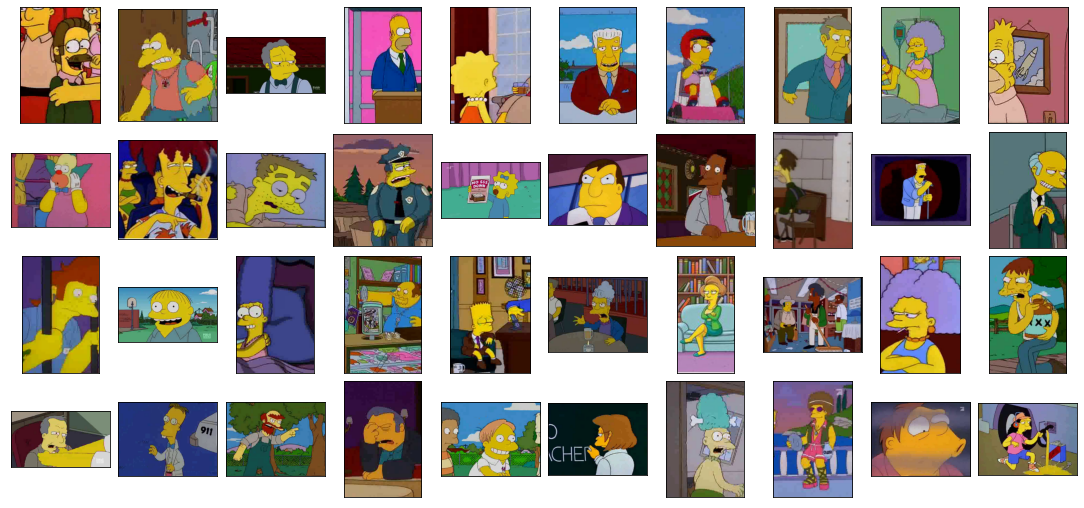

In [ ]:
# Create a DataFrame with one Label of each category

df_unique = df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display 40 pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
#     ax.set_title(df_unique.Label[i])
plt.tight_layout(pad=0.5)
plt.show()

# Splitting data into train and test

In [ ]:
# taken 80% of the dataset as training 

train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=0)

# 2.Loading images with a generator

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 26794 validated image filenames belonging to 42 classes.
Found 6698 validated image filenames belonging to 42 classes.
Found 8374 validated image filenames belonging to 42 classes.


In [ ]:
# Load the pretained model

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


# 3.Training the model

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(42, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
838/838 [==============================] - 1670s 2s/step - loss: 1.6602 - accuracy: 0.5553 - val_loss: 1.1851 - val_accuracy: 0.6818
Epoch 2/50
838/838 [==============================] - 1555s 2s/step - loss: 0.9926 - accuracy: 0.7267 - val_loss: 0.9618 - val_accuracy: 0.7392
Epoch 3/50
838/838 [==============================] - 1581s 2s/step - loss: 0.7666 - accuracy: 0.7838 - val_loss: 0.9058 - val_accuracy: 0.7543
Epoch 4/50
838/838 [==============================] - 1579s 2s/step - loss: 0.6208 - accuracy: 0.8210 - val_loss: 0.8018 - val_accuracy: 0.7775
Epoch 5/50
838/838 [==============================] - 1560s 2s/step - loss: 0.4965 - accuracy: 0.8560 - val_loss: 0.7181 - val_accuracy: 0.8110
Epoch 6/50
838/838 [==============================] - 1525s 2s/step - loss: 0.4166 - accuracy: 0.8752 - val_loss: 0.7284 - val_accuracy: 0.8059
Epoch 7/50
838/838 [==============================] - 1538s 2s/step - loss: 0.3303 - accuracy: 0.8999 - val_loss: 0.6749 - val_accuracy:

# 4.Visualizing the Results

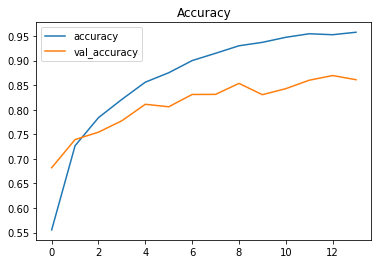

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

The accuracy of the model goes on increasing and we got val_accuracy of 86.10%.

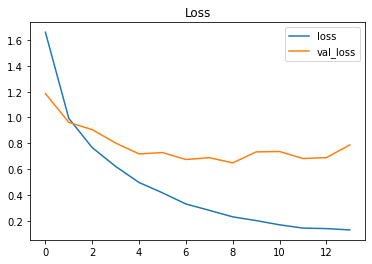

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images

pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

262/262 [==============================] - 394s 1s/step
The first 5 predictions: ['krusty_the_clown', 'bart_simpson', 'mayor_quimby', 'apu_nahasapeemapetilon', 'homer_simpson']


In [ ]:
from sklearn.metrics import accuracy_score
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 85.38%


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.95      0.72      0.82       394
           agnes_skinner       1.00      0.38      0.55        16
  apu_nahasapeemapetilon       0.84      0.94      0.89       260
           barney_gumble       0.88      0.74      0.81        31
            bart_simpson       0.85      0.91      0.88       536
            carl_carlson       0.71      0.75      0.73        40
charles_montgomery_burns       0.83      0.87      0.85       492
            chief_wiggum       0.89      0.93      0.91       375
         cletus_spuckler       0.78      0.70      0.74        20
          comic_book_guy       0.82      0.88      0.85       202
               disco_stu       1.00      0.00      0.00         1
          edna_krabappel       0.81      0.89      0.85       187
                fat_tony       1.00      0.50      0.67        12
                     gil       0.62      0.67      0.64        12
    groun

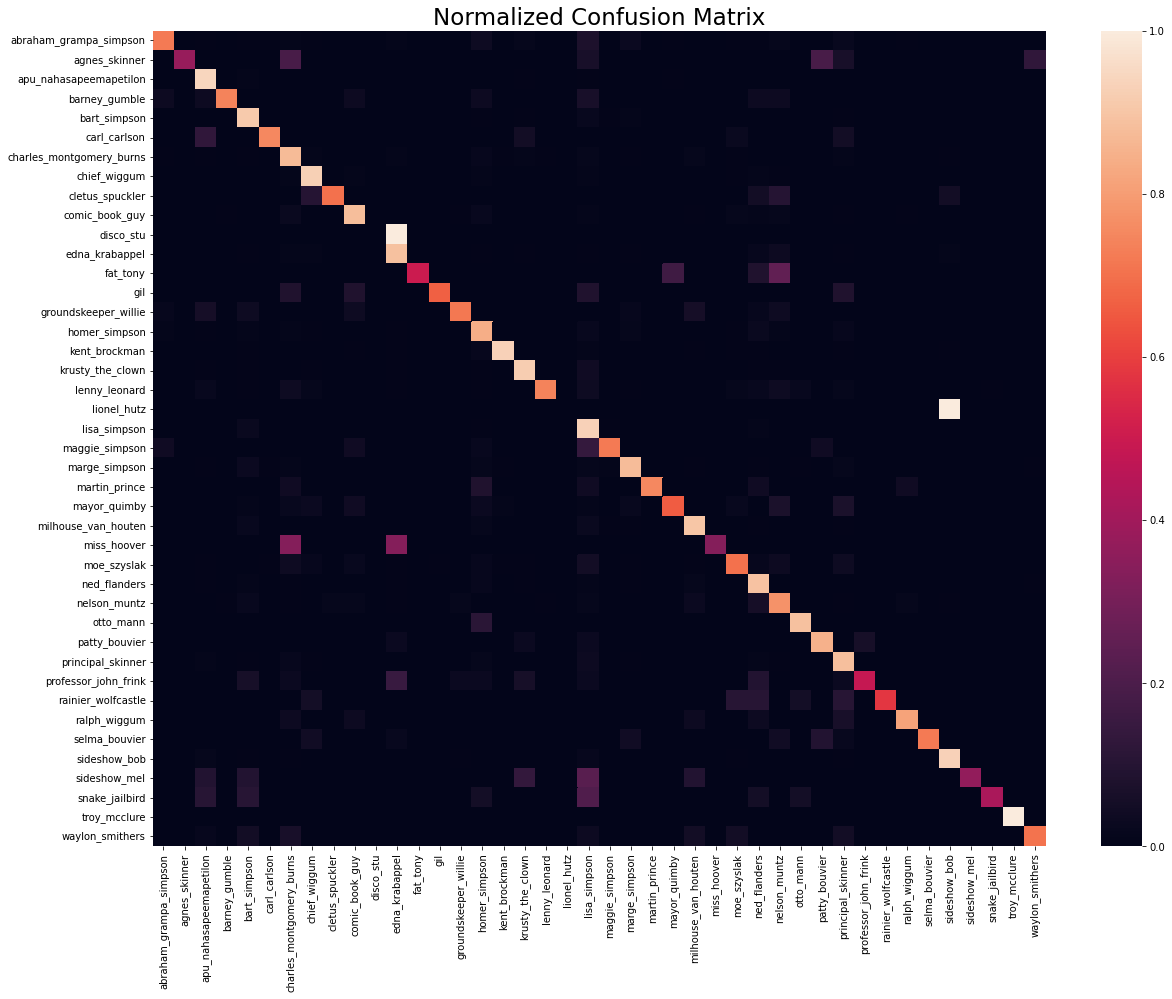

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.show()

# Predicting 50 pictures

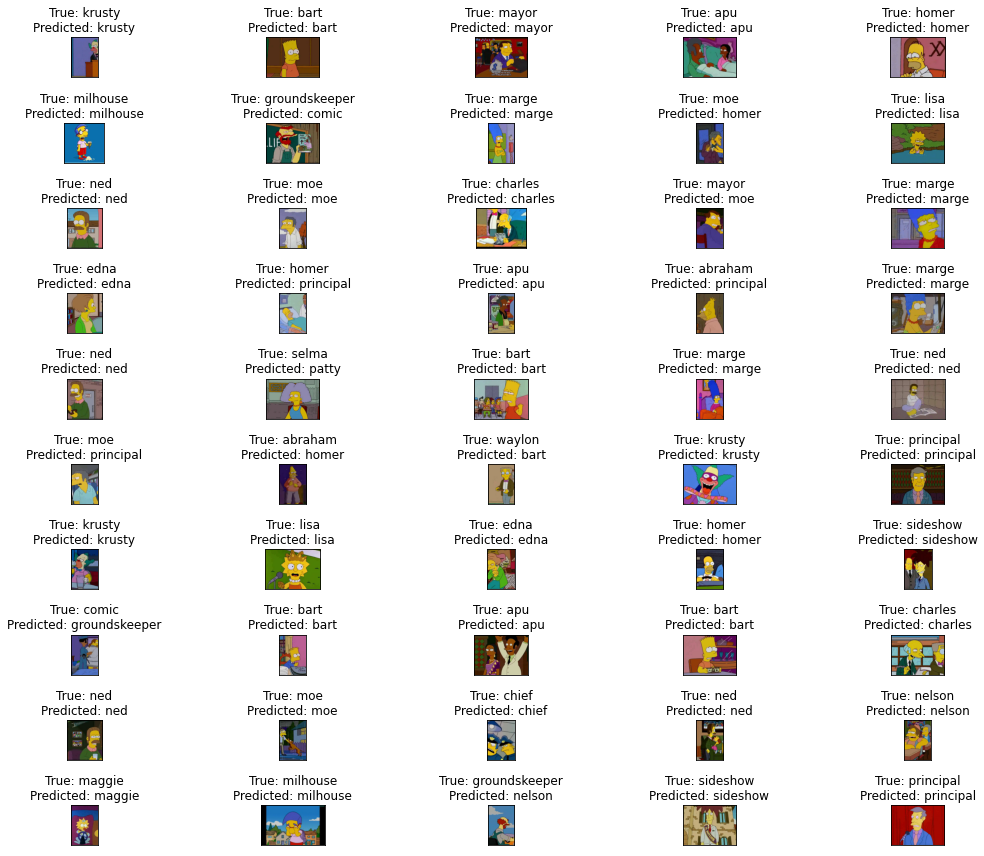

In [ ]:
# Display 50 picture of the dataset with their labels

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}")
plt.tight_layout()
plt.show()

# We got val_accuracy as 86.10% and test accuracy as 85.38%
